In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [3]:
# Create a dataset using sklearn circle
from sklearn.datasets import make_circles

# Create 1000 samples
n_samples = 1000

# Create dataset
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [8]:
X[:10], y[:10], X.shape, y.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64),
 (1000, 2),
 (1000,))

In [10]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:,1], 'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [11]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [12]:
circles.label.unique()

array([1, 0], dtype=int64)

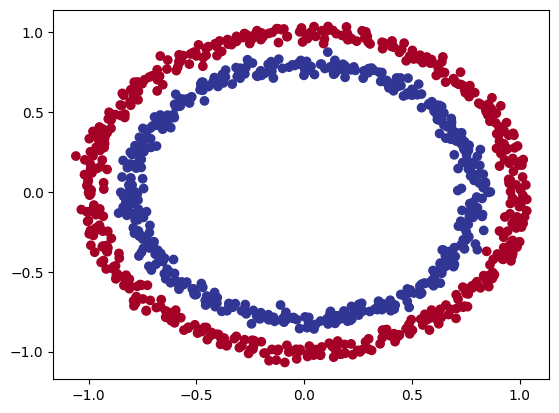

In [18]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [24]:
X.shape, y.shape, X[0], X.ndim, y.ndim

((1000, 2), (1000,), array([0.75424625, 0.23148074]), 2, 1)

In [20]:
len(X), len(y)

(1000, 1000)

In [26]:
# Set random seed
tf.random.set_seed(42)

#1. Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

# fit
model_1.fit(
    X,
    y,
    epochs =5
)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.3505 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7445 - accuracy: 0.5010
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4880


In [27]:
# fit for longer
model_1.fit(
    X,
    y,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4610
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5120
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4930
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4930
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4720
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4470
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4720
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4820
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4860
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5050
Epoch 93/100


In [28]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

In [30]:
tf.random.set_seed(42)
# create Model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
               )
# fit
model_2.fit(
    X,
    y,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.5807 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7839 - accuracy: 0.4970
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7210 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7048 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5030
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4770
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5080
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4910
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4860
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4670
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4710
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5050
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4900
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4890
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4940
Epoch 93/100


In [32]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932442784309387, 0.5]

In [45]:
# lets improve model_2
tf.random.set_seed(42)
# create Model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), # 1-10,
    tf.keras.layers.Dense(1)
])
# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # SGD to Adam
                metrics=['accuracy']
               )
# fit
model_2.fit(
    X,
    y,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.9965 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6612 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8933 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8240 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7900 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7650 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7464 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7327 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4740
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5060
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5080
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4920
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4900
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4640
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4600
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4740
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4870
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5140
Epoch 93/100


In [46]:
model_2.evaluate(X, y)
# impoving as well as

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5200


[0.6931905150413513, 0.5199999809265137]

In [48]:
# Creating another layer in the model
tf.random.set_seed(42)
# model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
# fit
model_3.fit(
    X,
    y,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.7512 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5100
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4310
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4540
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5090
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.4660
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.4930
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4650
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4620
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4780
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.4870
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4980
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4810
Epoch 93/100


In [49]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.5040


[0.6997454762458801, 0.5040000081062317]

# prediction Visulization


In [52]:
'''
    Takes in a trained model, features (X) and labels (y).
    Creates a meshgrid of the different X values.
    Makes predictions across the meshgrid.
    Plots the predictions as well as a line between the different zones (where each unique class falls).
'''

'\n    Takes in a trained model, features (X) and labels (y).\n    Creates a meshgrid of the different X values.\n    Makes predictions across the meshgrid.\n    Plots the predictions as well as a line between the different zones (where each unique class falls).\n'

In [61]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create meshgrid.
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 0].min()-0.1, X[:, 1].max()+0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    # create x values and predict
    X_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(X_in)
    
    # multiclass or binary class
    if model.output_shape[-1] > 1:
        print('multiclass Classification')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('binary Classification')
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
        
    # plot
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [62]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 1s 2ms/step
binary Classification


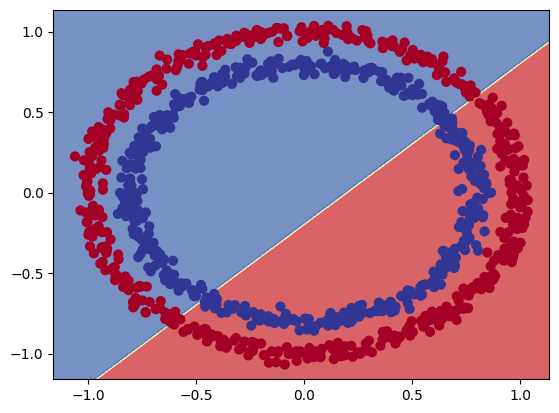

In [63]:
plot_decision_boundary(model_3, X, y)

In [64]:
'''
here looks like our model is trying to draw a straight line through the data.
Such as Regression type problem. There must be something we are missing out for classification problem. Our model must be learning something, 
And this is Non-linearity.
So, we should try Activation Function
'''

'\nhere looks like our model is trying to draw a straight line through the data.\nSuch as Regression type problem. There must be something we are missing out for classification problem. Our model must be learning something, \nAnd this is Non-linearity.\nSo, we should try Activation Function\n'

In [66]:
tf.random.set_seed(42)
#model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
    
])

#compile
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
# fit
model_4.fit(
    X,
    y,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3708 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9542 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7089 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4252 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5063 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2245 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1511 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1146 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0850 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0590 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 93/100


In [67]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4690


[0.6934298276901245, 0.4690000116825104]

313/313 [==============================] - 1s 2ms/step
binary Classification


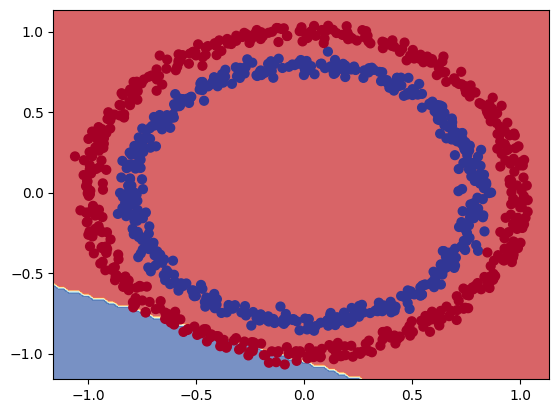

In [68]:
plot_decision_boundary(model_4, X, y)

In [79]:
tf.random.set_seed(42)
#model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
    
])

#compile
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
# fit
model_4.fit(
    X,
    y,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.9545 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4204 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9400 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5369 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.1836 - accuracy: 0.4460
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.7119 - accuracy: 0.4570
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2932 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0868 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9667 - accuracy: 0.4620
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8653 - accuracy: 0.4510
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.7310
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.7580
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7510
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.7550
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.7470
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.7190
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.7190
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.7100
Epoch 91/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6249 - accuracy: 0.7210
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6248 - accuracy: 0.7440
Epoch 93/100


In [80]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6208 - accuracy: 0.7280


[0.6208237409591675, 0.7279999852180481]

313/313 [==============================] - 1s 2ms/step
binary Classification


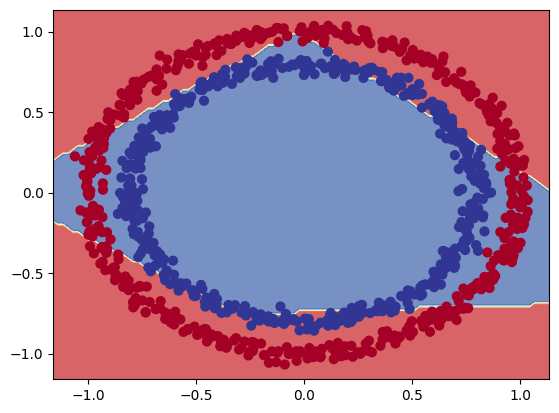

In [81]:
plot_decision_boundary(model_4, X, y)

In [83]:
tf.random.set_seed(42)

#model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

#compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])
# fit
model_5.fit(
    X, 
    y, 
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 6.8930 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3346 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3242 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1314 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1173 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9838 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9361 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9003 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8722 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8480 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.6810
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7310
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6128 - accuracy: 0.7400
Epoch 86/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6079 - accuracy: 0.7520
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5991 - accuracy: 0.7400
Epoch 88/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5935 - accuracy: 0.7440
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.7680
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.7630
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.8150
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.8290
Epoch 93/100


In [84]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.8820


[0.5163734555244446, 0.8820000290870667]

313/313 [==============================] - 1s 2ms/step
binary Classification


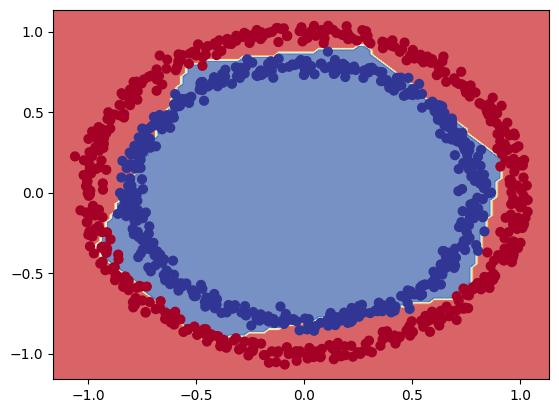

In [86]:
plot_decision_boundary(model_5, X, y)

In [87]:
# Adding Activation at output layer

tf.random.set_seed(42)

#model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

#compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])
# fit
model_5.fit(
    X, 
    y, 
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.6934 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5130
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5060
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5350
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5300
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5010
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5400
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5680
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5880
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5400
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.9250
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3834 - accuracy: 0.9360
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.9330
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3755 - accuracy: 0.9370
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3699 - accuracy: 0.9360
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.9400
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.9410
Epoch 90/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3579 - accuracy: 0.9440
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3529 - accuracy: 0.9480
Epoch 92/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3483 - accuracy: 0.9490
Epoch 93/100


In [88]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.9650


[0.31344175338745117, 0.9649999737739563]

313/313 [==============================] - 1s 2ms/step
binary Classification


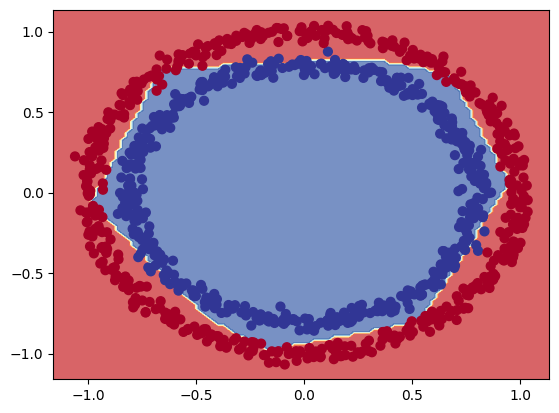

In [89]:
plot_decision_boundary(model_5, X, y)

In [90]:
# increasing number of neuron of hidden layers
# Adding Activation at output layer

tf.random.set_seed(42)

#model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

#compile
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])
# fit
model_6.fit(
    X, 
    y, 
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.7009 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.4950
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5200
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5190
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 1.0000
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 1.0000
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 1.0000
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 1.0000
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0482 - accuracy: 1.0000
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 1.0000
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 1.0000
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 1.0000
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 1.0000
Epoch 92/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 1.0000
Epoch 93/100


In [94]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 1.0000


[0.03172380477190018, 1.0]

313/313 [==============================] - 1s 2ms/step
binary Classification


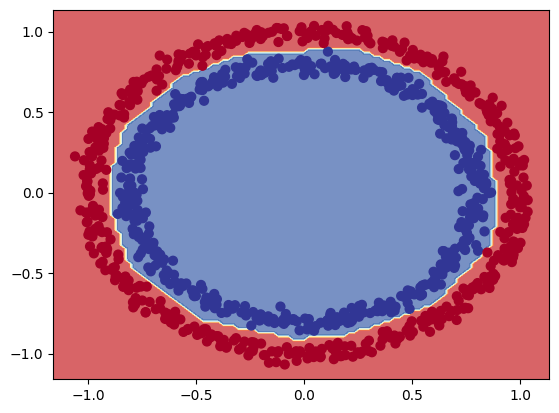

In [95]:
plot_decision_boundary(model_6, X, y)

In [96]:
model_6.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 10)                30        
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


# Visualize Activation Functions

In [97]:
# Create data
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

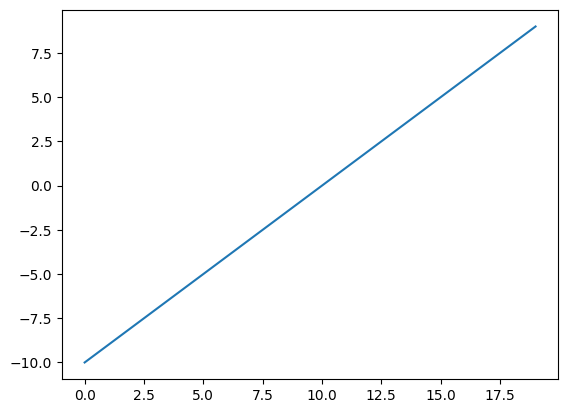

In [98]:
plt.plot(A)

In [99]:
# sigmoid function

def sigmoid(x):
    return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

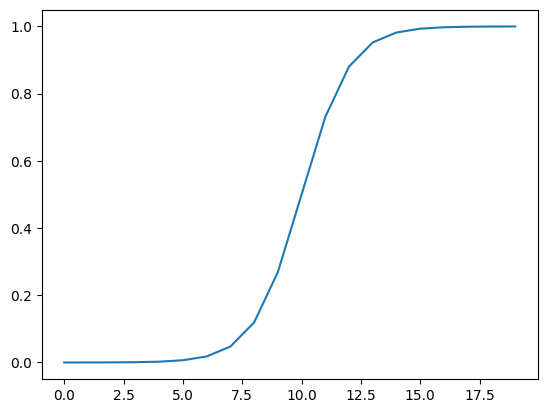

In [100]:
plt.plot(sigmoid(A))

In [101]:
def relu(x):
    return tf.maximum(0, x)


relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

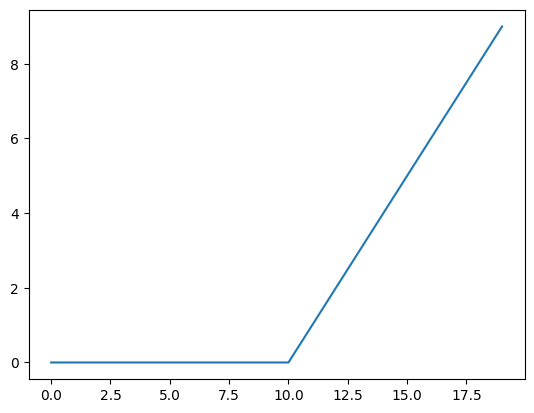

In [102]:
plt.plot(relu(A))

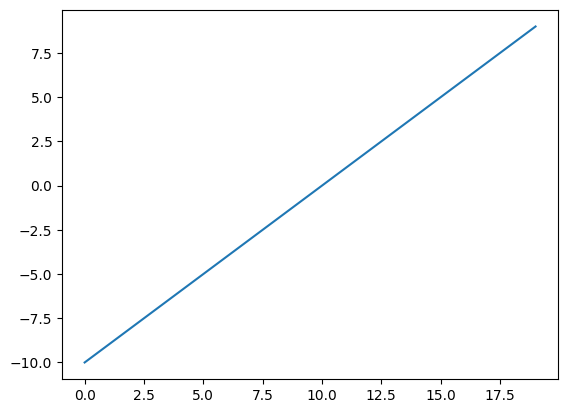

In [103]:
plt.plot(A)

In [104]:
# it's looks like linear types of data. lets check

A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluate and Improving our Classification model

In [105]:
'''
we have been evaluating our model on the same data it was trained on. 
A better approach would be to split our data into trainig, validation, test sets. though validation is optional.
Then apply on the model.
lets do it
'''


'\nwe have been evaluating our model on the same data it was trained on. \nA better approach would be to split our data into trainig, validation, test sets. though validation is optional.\nThen apply on the model.\nlets do it\n'

In [106]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [107]:
len(X)

1000

In [109]:
# Split
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [112]:
tf.random.set_seed(42)
#model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])

# fit
history = model_7.fit(
    X_train,
    y_train,
    epochs=100
)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.7096 - accuracy: 0.4863
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.4812
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.4750
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.4712
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4650
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4112
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.4800
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.4900
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.4963
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.4925
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 1.0000
Epoch 84/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 1.0000
Epoch 85/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9987
Epoch 86/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 1.0000
Epoch 87/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0870 - accuracy: 1.0000
Epoch 88/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 1.0000
Epoch 89/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 1.0000
Epoch 90/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0792 - accuracy: 1.0000
Epoch 91/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 1.0000
Epoch 92/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 1.0000
Epoch 93/100


In [115]:
#Evaluate on test set
loss, accuracy = model_7.evaluate(X_test, y_test)
print('losses:', loss)
print('accuracy:', accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 1.0000
losses: 0.0611521378159523
accuracy: 1.0


In [130]:
# Adding Activation at output layer

tf.random.set_seed(42)

#model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

#compile
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])
# fit
history=model_8.fit(
    X_train, 
    y_train, 
    epochs=25
)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.7050 - accuracy: 0.5075
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5063
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5038
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5063
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.4638
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.4600
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5088
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5400
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5537
Epoch 11/25
25/25 [

In [131]:
loss, accuracy = model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.6590 - accuracy: 0.5500


313/313 [==============================] - 1s 2ms/step
binary Classification
313/313 [==============================] - 1s 2ms/step
binary Classification


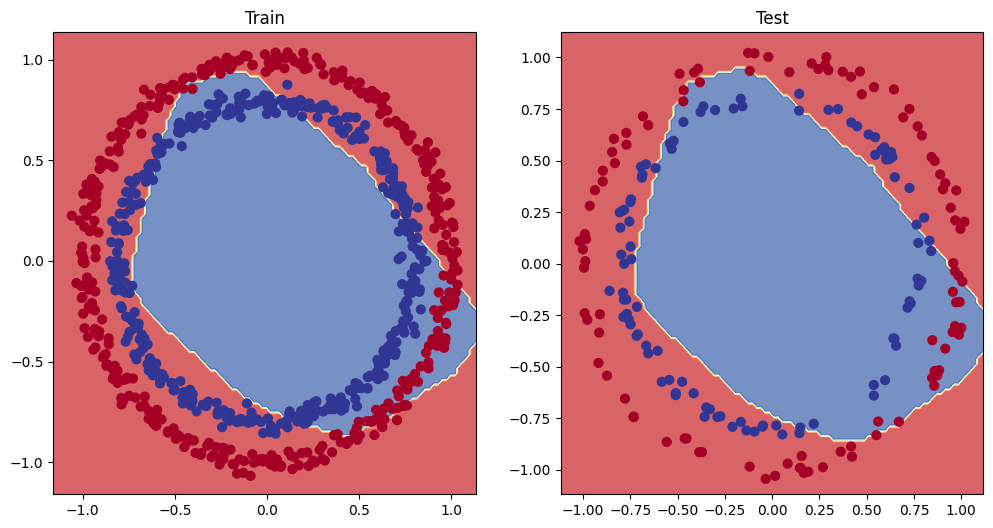

In [132]:
# plotting train and test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)

plt.show()

ValueError: array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64) is not a valid value for color

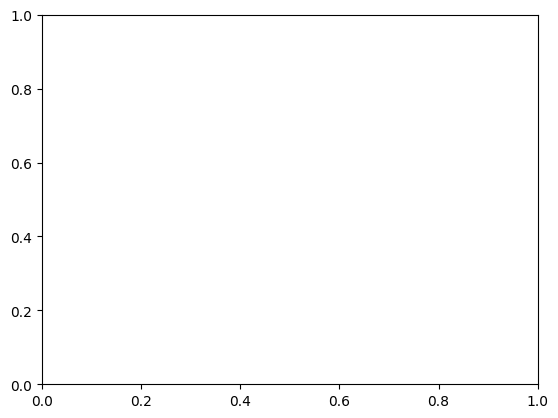

In [126]:
plt.plot(loss, accuracy, c=y)

In [133]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.704985,0.50750
1,0.699200,0.50625
2,0.695927,0.50375
3,0.693616,0.50500
4,0.691800,0.50625
5,0.690044,0.46375
6,0.687922,0.46000
7,0.686616,0.50875
8,0.684782,0.54000
9,0.682700,0.55375


<AxesSubplot:>

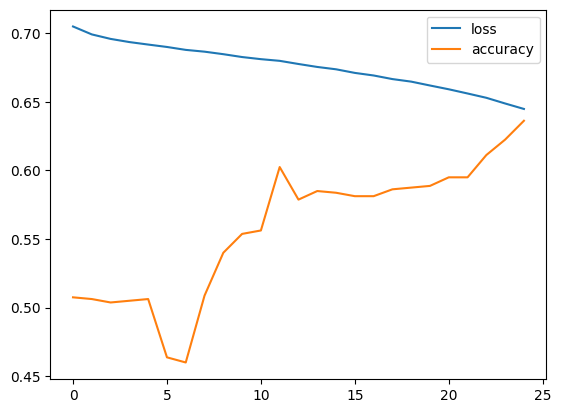

In [134]:
pd.DataFrame(history.history).plot()

# Finding the best learning rate

In [135]:
# Aside from the architecture itself the most important hyperparameter you can tune for NN model is the **learning rate**

In [138]:
# Create a model with default learning rate and leraning rate callback
tf.random.set_seed(42)

#model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model_9.compile(loss='binary_crossentropy', #we can use string
               optimizer='Adam', # same as tf.keras.activations.Adam()
               metrics=['accuracy'])
#craete lr scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) ## traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch


#fit
history=model_9.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5100 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3291 - accuracy: 0.8763 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9413 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2738 - accuracy: 0.8975 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1891 - accuracy: 0.9300 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9762 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9262 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9212 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.7887 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.5

<AxesSubplot:xlabel='epochs'>

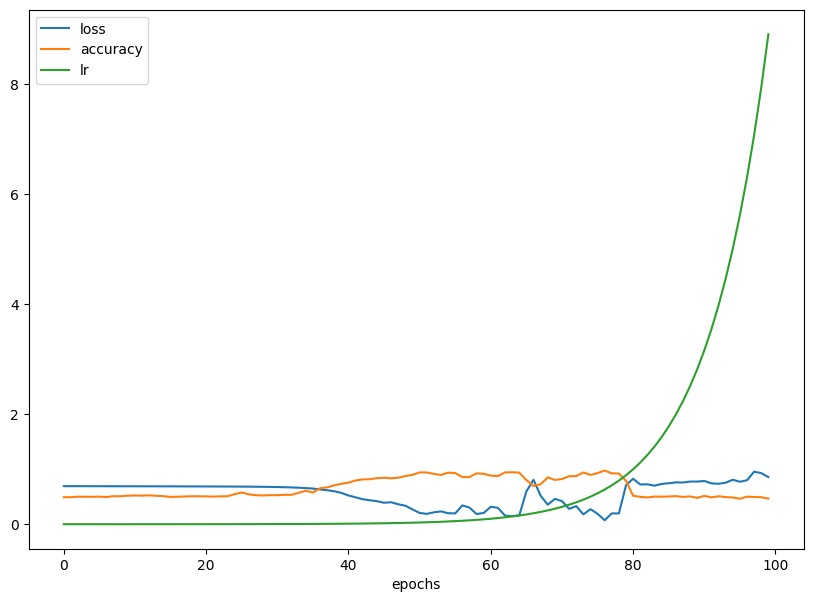

In [140]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

In [141]:
'''
you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.
'''

"\nyou can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.\n\nTo figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.\n"

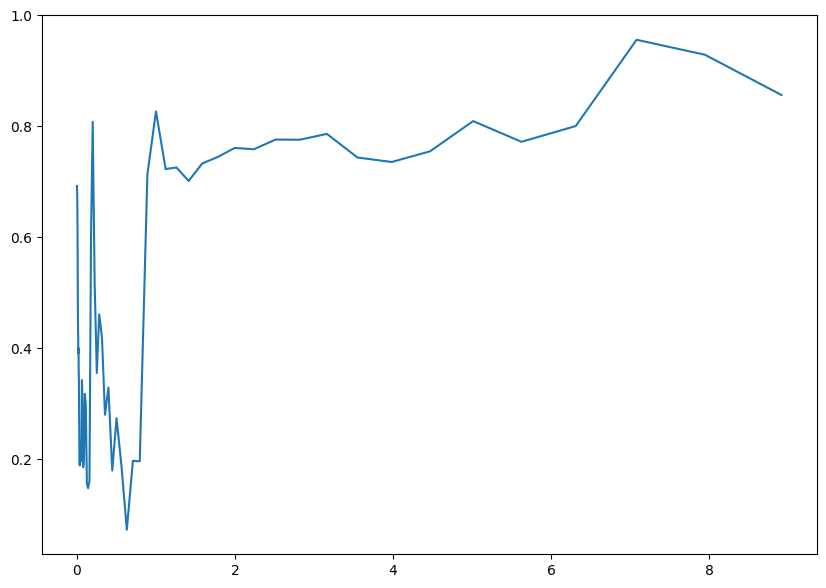

In [145]:
# plot the lr vs the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.plot(lrs, history.history['loss'])

In [143]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Text(0.5, 1.0, 'Learning Rate vs Loss')

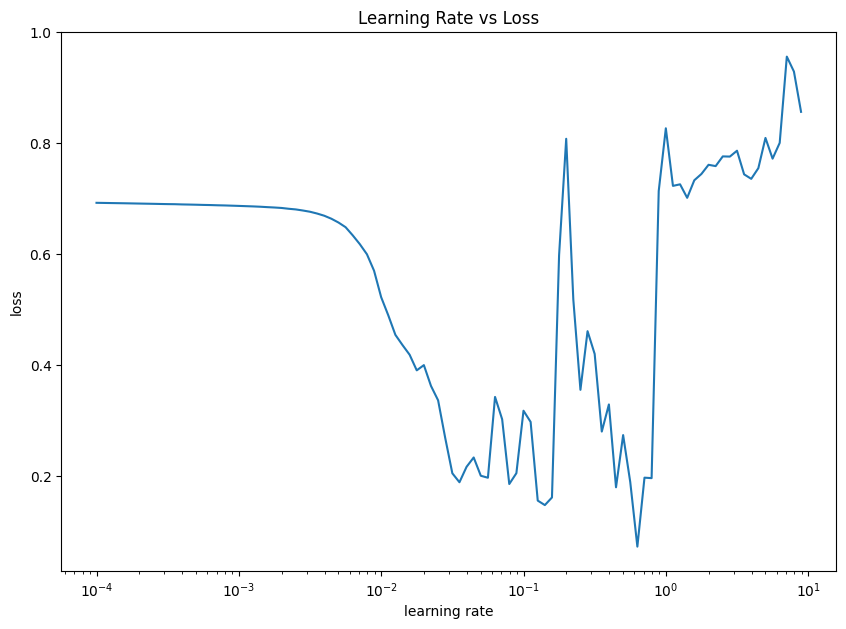

In [149]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss']) # semilogx for towards x axis
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Learning Rate vs Loss')

In [172]:
# Adding Activation at output layer

tf.random.set_seed(42)

#model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

#compile
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.3),
               metrics=['accuracy'])
# fit
history=model_10.fit(
    X_train, 
    y_train, 
    epochs=25
)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7088 - accuracy: 0.4775
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4762
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4800
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4700
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4675
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4625
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4675
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.4675
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.4888
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5225
Epoch 11/25
25/25 [

In [152]:
loss, accuracy = model_10.evaluate(X_test, y_test) # lr = 0.1

7/7 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.5950


In [154]:
loss, accuracy = model_10.evaluate(X_test, y_test) # lr = 0.3

7/7 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.7500


In [158]:
loss, accuracy = model_10.evaluate(X_test, y_test) # lr = 0.8

7/7 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6500


In [160]:
loss, accuracy = model_10.evaluate(X_test, y_test) # lr = 0.5

7/7 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6800


In [162]:
loss, accuracy = model_10.evaluate(X_test, y_test) # lr = 0.4

7/7 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6350


In [173]:
loss, accuracy = model_10.evaluate(X_test, y_test) # lr = 0.3

7/7 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.7700


313/313 [==============================] - 0s 998us/step
binary Classification
313/313 [==============================] - 0s 1ms/step
binary Classification


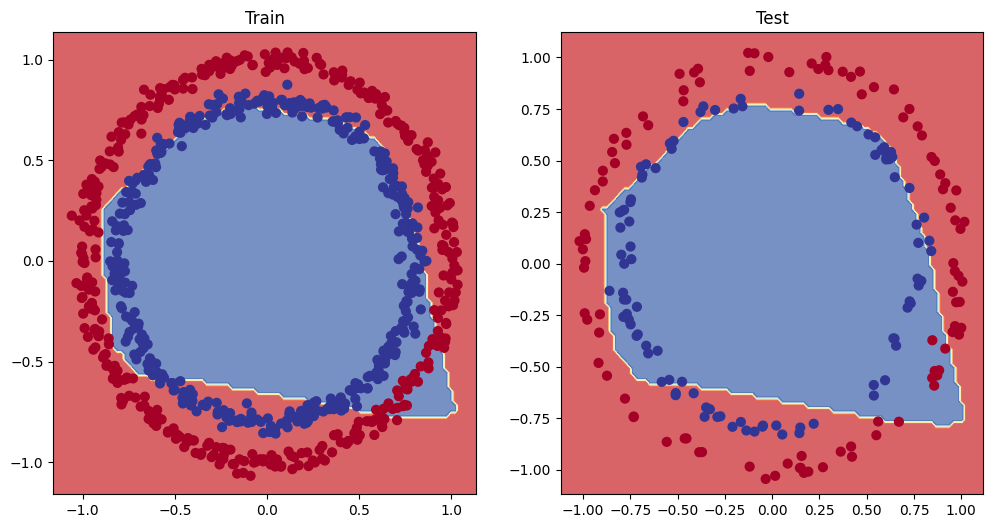

In [174]:
# plotting train and test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)

plt.show()

In [176]:
y_preds

NameError: name 'y_preds' is not defined

In [180]:
y_preds = model_10.predict(X_test)
y_preds[:10], y_test[:10]

7/7 [==============================] - 0s 2ms/step


(array([[0.50830954],
        [0.5705038 ],
        [0.49964473],
        [0.5261621 ],
        [0.44741994],
        [0.47347298],
        [0.49310035],
        [0.43817616],
        [0.50410277],
        [0.4408872 ]], dtype=float32),
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64))

In [181]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [182]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [183]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tf.round(y_preds))

array([[93,  8],
       [38, 61]], dtype=int64)

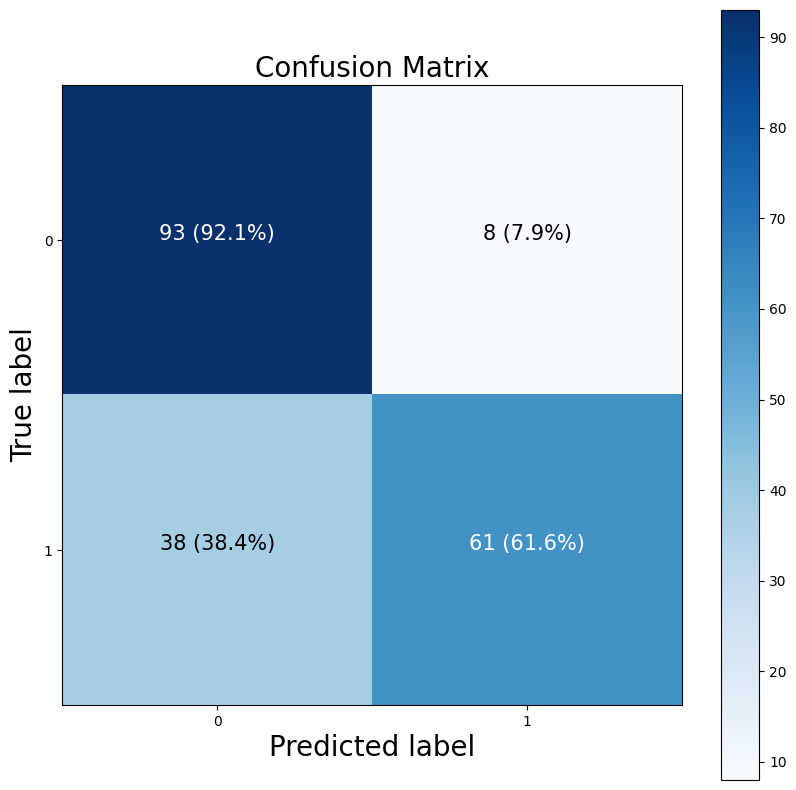

In [185]:
# visualization of confusion matrix

import itertools
figsize = (10, 10)

# craete confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [186]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


# Working with Large Dataset

# Multiclass Classification ( Fashion MNIST built-in)

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [4]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_l